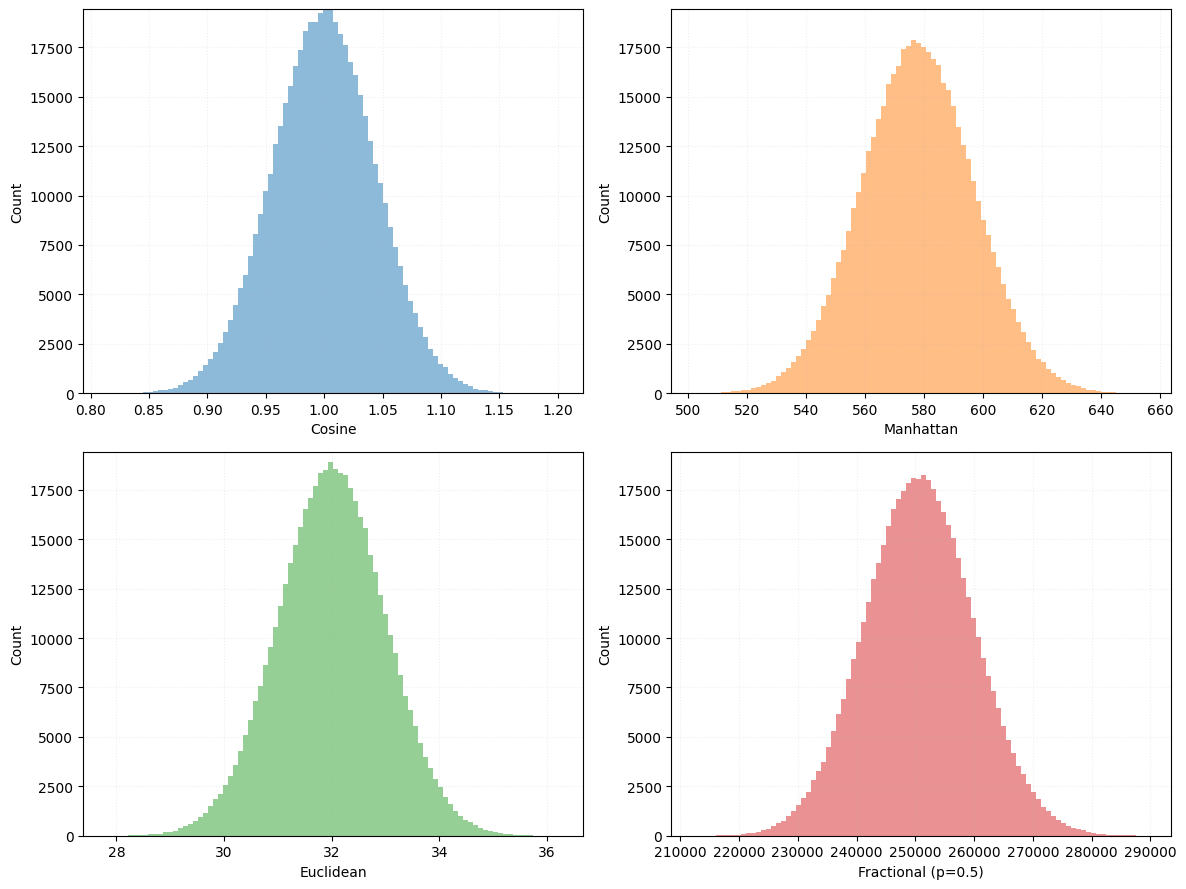

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Settings
N = 1000          # number of embeddings
D = 512           # dimensionality
seed = 42         # RNG seed
fractional_p = 0.5  # Minkowski order for fractional distance (0 < p < 1)

# Generate random embeddings
rng = np.random.default_rng(seed)
X = rng.normal(0, 1, size=(N, D))

# Compute condensed pairwise distances for each metric
d_cosine = pdist(X, metric="cosine")
d_manhattan = pdist(X, metric="cityblock")
d_euclidean = pdist(X, metric="euclidean")
d_fractional = pdist(X, metric="minkowski", p=fractional_p)

# Prepare metric arrays and labels/colors
metrics = [
    ("Cosine", d_cosine, "#1f77b4"),
    ("Manhattan", d_manhattan, "#ff7f0e"),
    ("Euclidean", d_euclidean, "#2ca02c"),
    (f"Fractional (p={fractional_p})", d_fractional, "#d62728"),
]

# Grid configuration
rows, cols = 2, 2  # change to 4, 4 if you prefer a larger canvas
fig, axs = plt.subplots(rows, cols, figsize=(12, 9))

max_count = 0

# Plot each distribution with its own x-range
for ax, (name, arr, color) in zip(np.ravel(axs), metrics):
    n, _, _ = ax.hist(arr, bins=np.linspace(arr.min(), arr.max(), 101), density=False, alpha=0.5, color=color)
    max_count = max(max_count, n.max())
    ax.set_xlim(arr.min(), arr.max())
    ax.set_xlabel(name)
    ax.set_ylabel("Count")
    ax.grid(alpha=0.2, linestyle=":")

for ax in np.ravel(axs)[:len(metrics)]:
    ax.set_ylim(0, max_count)
# Hide any unused axes if the grid is larger than needed
for ax in np.ravel(axs)[len(metrics):]:
    ax.axis("off")

plt.tight_layout()
plt.show()


In [3]:
np.mean(d_cosine), np.mean(d_manhattan), np.mean(d_euclidean), np.mean(d_fractional)


(np.float64(1.0000274941549108),
 np.float64(578.0799337448844),
 np.float64(32.008184002921304),
 np.float64(250826.84141512925))

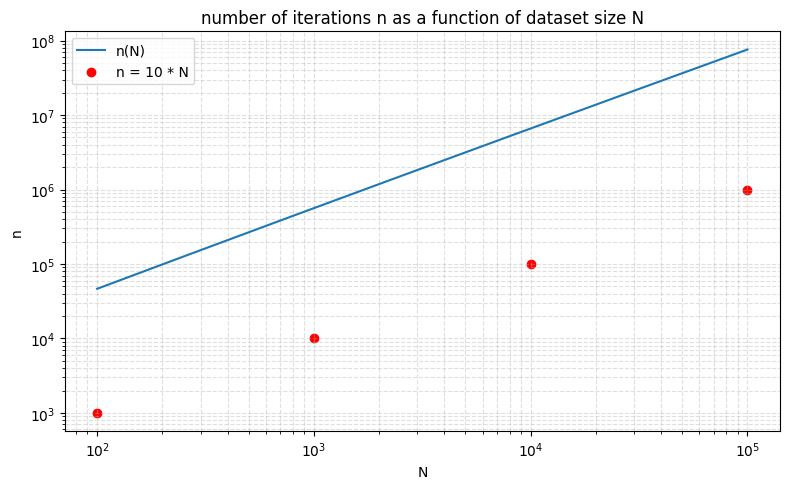

In [12]:


# Constants (adjust as needed)
d = 512
ds = 2
p = 0.05
# r = 1000
r = 5

# N from 100 to 100000, logarithmically spaced
N = np.logspace(2, 5, 1000)

# n(N) = ln((N*d)/(1-p)) / (((1+r)/N) * (ds/d))
n = np.log((N * d) / (1 - p)) / (((1 + r) / N) * (ds / d))

default_xs = np.array([100, 1000, 10000, 100000])
default_ys = 10 * default_xs

plt.figure(figsize=(8, 5))
plt.plot(N, n, label='n(N)')
plt.scatter(default_xs, default_ys, color='red', label='n = 10 * N')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('n')
plt.title('number of iterations n as a function of dataset size N')
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.legend()
plt.show()

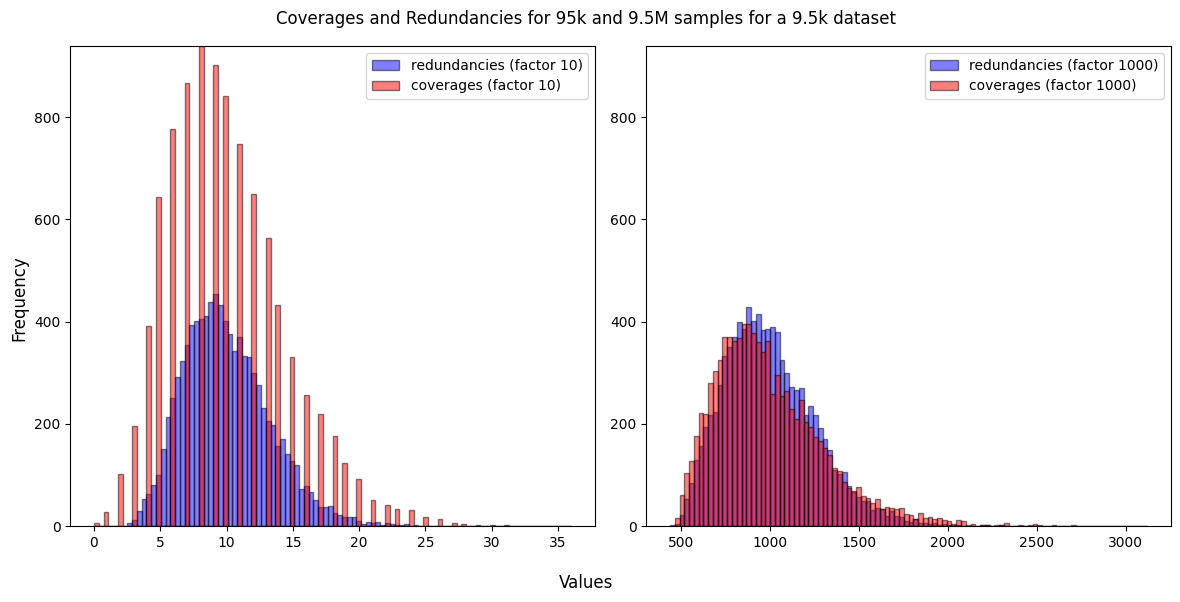

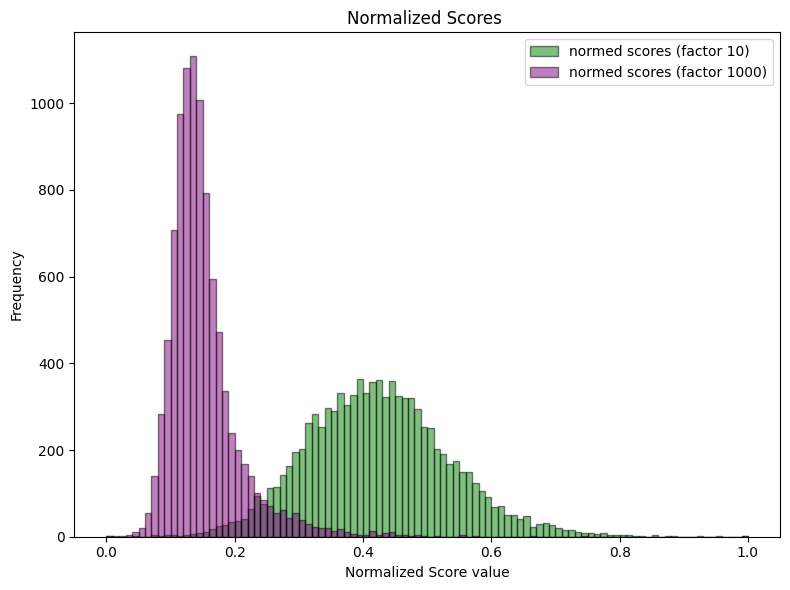

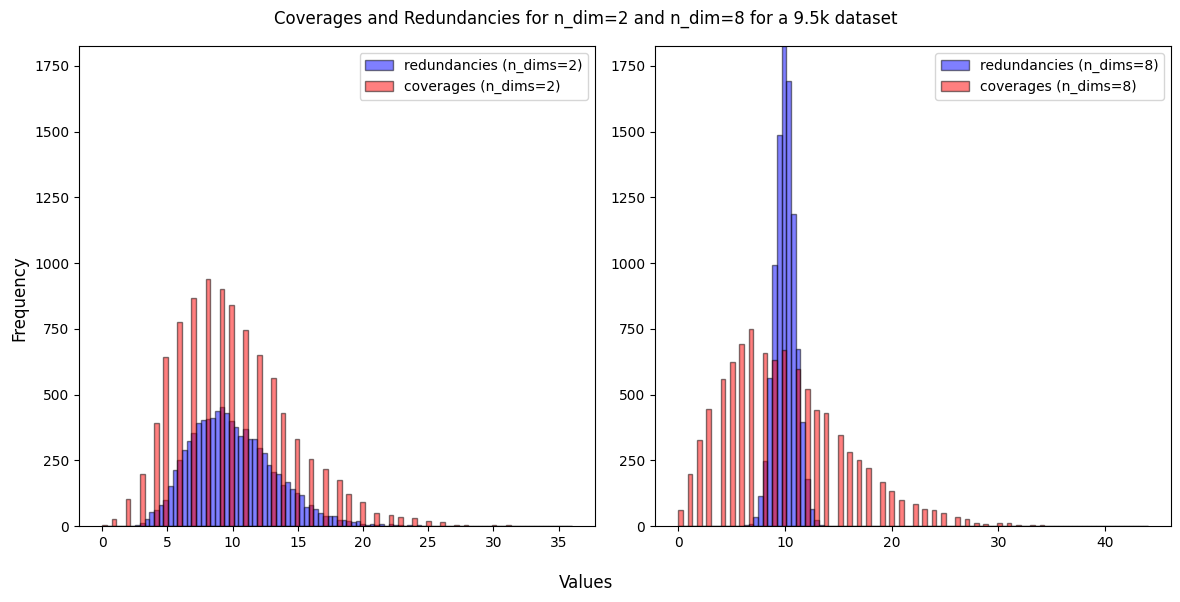

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_bins = 100

redunds_default = np.load('data/redundancies_95000.npy')
covs_default = np.load('data/coverages_95000.npy')
scores_default = covs_default - redunds_default

data_min_default = min(redunds_default.min(), covs_default.min())
data_max_default = max(redunds_default.max(), covs_default.max())
shared_bins_default = np.linspace(data_min_default, data_max_default, num_bins + 1)

# Normalized scores 10
scores_min_default = scores_default.min()
scores_max_default = scores_default.max()
scores_norm_default = (scores_default - scores_min_default) / (scores_max_default - scores_min_default)

# Data Loading - Factor 1000
redunds_1000 = np.load('data/redundancies_9500000.npy')
covs_1000 = np.load('data/coverages_9500000.npy')
scores_1000 = covs_1000 - redunds_1000

data_min_1000 = min(redunds_1000.min(), covs_1000.min())
data_max_1000 = max(redunds_1000.max(), covs_1000.max())
shared_bins_1000 = np.linspace(data_min_1000, data_max_1000, num_bins + 1)

# Normalized scores 1000
scores_min_1000 = scores_1000.min()
scores_max_1000 = scores_1000.max()
scores_norm_1000 = (scores_1000 - scores_min_1000) / (scores_max_1000 - scores_min_1000)

scores_norm_bins = np.linspace(0, 1, num_bins + 1)

# --- Figure 1: Coverages and Redundancies ---
fig1, axs1 = plt.subplots(1, 2, figsize=(12, 6))

frequencies_1 = []

# Subplot 1: Factor 10
y, _, _ = axs1[0].hist(redunds_default, bins=shared_bins_default, color='blue', edgecolor='black', alpha=0.5, label="redundancies (factor 10)")
frequencies_1.append(y)
y, _, _ = axs1[0].hist(covs_default, bins=shared_bins_default, color='red', edgecolor='black', alpha=0.5, label="coverages (factor 10)")
frequencies_1.append(y)

# Subplot 2: Factor 1000
y, _, _ = axs1[1].hist(redunds_1000, bins=shared_bins_1000, color='blue', edgecolor='black', alpha=0.5, label="redundancies (factor 1000)")
frequencies_1.append(y)
y, _, _ = axs1[1].hist(covs_1000, bins=shared_bins_1000, color='red', edgecolor='black', alpha=0.5, label="coverages (factor 1000)")
frequencies_1.append(y)

# Set common frequency limits
max_freq_1 = np.max(frequencies_1)
axs1[0].set_ylim(top=max_freq_1)
axs1[1].set_ylim(top=max_freq_1)

# Labels for Fig 1
fig1.suptitle('Coverages and Redundancies for 95k and 9.5M samples for a 9.5k dataset')
fig1.supxlabel('Values')
fig1.supylabel('Frequency')

axs1[0].legend()
axs1[1].legend()

plt.tight_layout()
plt.show()

# --- Figure 2: Normalized Scores ---
fig2, ax2 = plt.subplots(figsize=(8, 6))

ax2.hist(scores_norm_default, bins=scores_norm_bins, color='green', edgecolor='black', alpha=0.5, label="normed scores (factor 10)")
ax2.hist(scores_norm_1000, bins=scores_norm_bins, color='purple', edgecolor='black', alpha=0.5, label="normed scores (factor 1000)")

ax2.set_title('Normalized Scores ')
ax2.set_xlabel('Normalized Score value')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
plt.show()



redunds_8dims = np.load('data/redundancies_dims=8.npy')
covs_8dims = np.load('data/coverages_dims=8.npy')
scores_8dims = covs_8dims - redunds_8dims
data_min_8dims = min(redunds_8dims.min(), covs_8dims.min())
data_max_8dims = max(redunds_8dims.max(), covs_8dims.max())
shared_bins_8dims = np.linspace(data_min_8dims, data_max_8dims, num_bins + 1)


scores_min_8dims = scores_8dims.min()
scores_max_8dims = scores_8dims.max()
scores_norm_8dims = (scores_8dims - scores_min_8dims) / (scores_max_8dims - scores_min_8dims)


# --- Figure 3: Coverages and Redundancies for 8 Dimensions ---
fig3, axs3 = plt.subplots(1, 2, figsize=(12, 6))

frequencies_3 = []

# Subplot 1: n_dims=2
y, _, _ = axs3[0].hist(redunds_default, bins=shared_bins_default, color='blue', edgecolor='black', alpha=0.5, label="redundancies (n_dims=2)")
frequencies_3.append(y)
y, _, _ = axs3[0].hist(covs_default, bins=shared_bins_default, color='red', edgecolor='black', alpha=0.5, label="coverages (n_dims=2)")
frequencies_3.append(y)

# Subplot 2: n_dims=8
y, _, _ = axs3[1].hist(redunds_8dims, bins=shared_bins_8dims, color='blue', edgecolor='black', alpha=0.5, label="redundancies (n_dims=8)")
frequencies_3.append(y)
y, _, _ = axs3[1].hist(covs_8dims, bins=shared_bins_8dims, color='red', edgecolor='black', alpha=0.5, label="coverages (n_dims=8)")
frequencies_3.append(y)

# Set common frequency limits
max_freq_3 = np.max(frequencies_3)
axs3[0].set_ylim(top=max_freq_3)
axs3[1].set_ylim(top=max_freq_3)

# Labels for Fig 3
fig3.suptitle('Coverages and Redundancies for n_dim=2 and n_dim=8 for a 9.5k dataset')
fig3.supxlabel('Values')
fig3.supylabel('Frequency')

axs3[0].legend()
axs3[1].legend()

plt.tight_layout()
plt.show()

# --- Figure 4: Normalized Scores (Dims Comparison) ---
fig4, ax4 = plt.subplots(figsize=(8, 6))

ax4.hist(scores_norm_default, bins=scores_norm_bins, color='green', edgecolor='black', alpha=0.5, label="normed scores (n_dims=2)")
ax4.hist(scores_norm_8dims, bins=scores_norm_bins, color='purple', edgecolor='black', alpha=0.5, label="normed scores (n_dims=8)")

ax4.set_title('Normalized Scores (n_dims Comparison)')
ax4.set_xlabel('Normalized Score value')
ax4.set_ylabel('Frequency')
ax4.legend()

plt.tight_layout()
plt.show()


In [13]:
print(np.max(redunds_1000))
print(np.min(redunds_1000))

print()


print(np.max(covs_1000))
print(np.min(covs_1000))

print()

print(np.max(scores_1000))
print(np.min(scores_1000))


2301.746734425892
460.26567586987085

3120.0
439.0

1281.3440925547068
-227.653276217751
